# Econ 425 Class Project

### Table of Contents
* [Data Preparation](#STEP_1)

<br>

* [Data Visualization](#STEP_2)

<br>

* [Data Splitting](#STEP_3)

<br>

* [Model Selection](#STEP_4)

    <br>
    
    * [PART 1. Linear Classification](#PART_1)
        * [Model 1 Ridge Classifier](#section_1_1)
        * [Model 2 SGDClassifier( Regularized Linear)](#section_1_2)
        * [Model 3 LASSO](#section_1_3)   
        * [Model 4 Linear Discriminant Analysis](#section_1_4)
        * [Finding Best Linear Classification Model](#section_1_5)
            * [AUC](#section_1_5_1)
            * [Precision](#section_1_5_2)
            * [Recall](#section_1_5_3) 
            
    <br>
    
    * [PART 2. Logistic Regression](#PART_2)
        * [Model 1 Simple Logistic Regression](#section_2_1)
        * [Model 2 With Ridge Penalization](#section_2_2)
        * [Model 3 With Ridge Penalization, solver = "liblinear"](#section_2_3)
        * [Model 4 With Lasso Penalization, solver = "liblinear"](#section_2_4)
        * [Model 5 With Lasso Penalization, solver = "saga"](#section_2_5)
        * [Model 6 With Elastic Net Penalization](#section_2_6)    
        
        * [Finding Best Logistic Regression Model](#section_2_7)
            * [AUC](#section_2_7_1)
            * [Precision](#section_2_7_2)
            * [Recall](#section_2_7_3)                  
        * [Analysis: On testing Sample](#section_2_8)  
        
        <br>
        
    * [PART 3. K-Nearest Neighbors](#PART_3)
        * [Finding Best Model with different learning rate](#section_3_1)
        * [Analysis: On testing Sample](#section_3_2)
            * [AUC](#section_3_2_1)
            * [Precision&Recall](#section_3_2_2)  
        
    <br>
    
    * [PART 4. Feedforward Neural Networks](#PART_4)
        * [Models with different hyperparameters 1-4](#section_4_1)
        * [Finding Best FNN Model](#section_4_2)
            * [AUC](#section_4_2_1)
            * [Precision](#section_4_2_2)
            * [Recall](#section_4_2_3)                  
        * [Analysis: On testing Sample](#section_4_3)
            * [AUC](#section_4_3_1)
            * [Precision&Recall](#section_4_3_2)  
            
        <br>
        
    * [PART 5. Support Vector Machine](#PART_5)
        * [Finding Best Model with different C-value](#section_5_1)  
        * [Analysis: On testing Sample](#section_5_2)
            * [AUC](#section_5_2_1)
            * [Precision&Recall](#section_5_2_2)      
            
    <br>
    
    * [PART 6. Random Forest](#PART_6)
        * [Models with different number of estimators](#section_6_1)
        * [Analysis: On testing Sample](#section_6_2)
            * [AUC](#section_6_2_1)
            * [Precision&Recall](#section_6_2_2)     

    <br>
    
    * [PART 7. Model Comparison](#PART_7)

    <br>

In [1]:
import numpy as np
from numpy import array
import pandas as pd
import download_data as dl

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator

#from conf_matrix import func_confusion_matrix
#import os # package for communicating with operating system
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier, SGDClassifier, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.svm as svm

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import r2_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
from yellowbrick.classifier import ClassificationReport

import random, heapq
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Activation, Dense
from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings("ignore")


#os.chdir('/Users/ruyalatif/Desktop/class project/our project')

# Data Preparation<a class="anchor" id="STEP_1"></a>

In [2]:
#load data
df = dl.download_data("creditcard.csv")

names = df.loc[0]
df.columns = names
df = df.iloc[1:]

df.head()

#we could see we need to normalize "Amount" and drop "Time"

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,...,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,0
2,0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,...,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,2.69,0
3,1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,...,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66,0
4,1,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,...,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,123.5,0
5,2,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,...,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,69.99,0


In [3]:
# seperate input and output datasets
y = pd.DataFrame(df['Class'].copy())
y=y.astype('int')

X = df.drop(["Time", "Class"], axis=1)

# rescale Feature "Amount"
X['Amount'] = [float(i) for i in X['Amount']]

amount_min = X['Amount'].min()
amount_denom = X['Amount'].max() - amount_min
X['Amount'] = (X['Amount'] - amount_min) / amount_denom


#check again
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,...,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,0.005824
2,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,...,-0.0690831352230203,-0.225775248033138,-0.638671952771851,0.101288021253234,-0.339846475529127,0.167170404418143,0.125894532368176,-0.00898309914322813,0.0147241691924927,0.000105
3,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,...,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,0.014739
4,-0.966271711572087,-0.185226008082898,1.79299333957872,-0.863291275036453,-0.0103088796030823,1.24720316752486,0.23760893977178,0.377435874652262,-1.38702406270197,-0.0549519224713749,...,-0.208037781160366,-0.108300452035545,0.00527359678253453,-0.190320518742841,-1.17557533186321,0.647376034602038,-0.221928844458407,0.0627228487293033,0.0614576285006353,0.004807
5,-1.15823309349523,0.877736754848451,1.548717846511,0.403033933955121,-0.407193377311653,0.0959214624684256,0.592940745385545,-0.270532677192282,0.817739308235294,0.753074431976354,...,0.408542360392758,-0.00943069713232919,0.79827849458971,-0.137458079619063,0.141266983824769,-0.206009587619756,0.502292224181569,0.219422229513348,0.215153147499206,0.002724


<br>

# Data Visualization<a class="anchor" id="STEP_2"></a>

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.0,284807
unique,124592,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,...,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,276176.000000,40134.0,4
top,163152,2.055797,-0.326668,-2.752041,-0.842316,2.463072,3.173856,-0.432126,0.727706,0.608606,...,0.269765,0.844627,0.020675,0.726212,0.366624,-0.398828,0.027735,-0.060282,1.0,0
freq,36,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,12295.0,251650


In [15]:
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [5]:
#checking null values
df.isnull().sum()

0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
#for Class
display(y.groupby(['Class']).size())

#Percentage proportion of fraud class and non-fraud class
fraud = df[df['Class']==1]
no_fraud = df[df['Class']==0]

print("Fraud Cases in our data set : ",len(fraud)*100/len(df)," %")
print("Non Fraud Cases in our data set : ",len(no_fraud)*100/len(df)," %")

# severely imbalanced

Class
0    284315
1       492
dtype: int64

Fraud Cases in our data set :  0.13693483657353928  %
Non Fraud Cases in our data set :  88.35808108649015  %


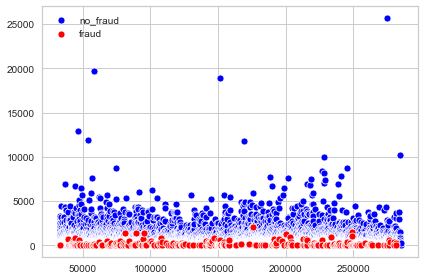

In [5]:
# For amount
#plotting Amount attribute as scatterplot
%matplotlib inline
sns.scatterplot(data=no_fraud['Amount'],color='blue')
sns.scatterplot(data=fraud['Amount'],color='red')
plt.legend(['no_fraud','fraud'])
plt.tight_layout()

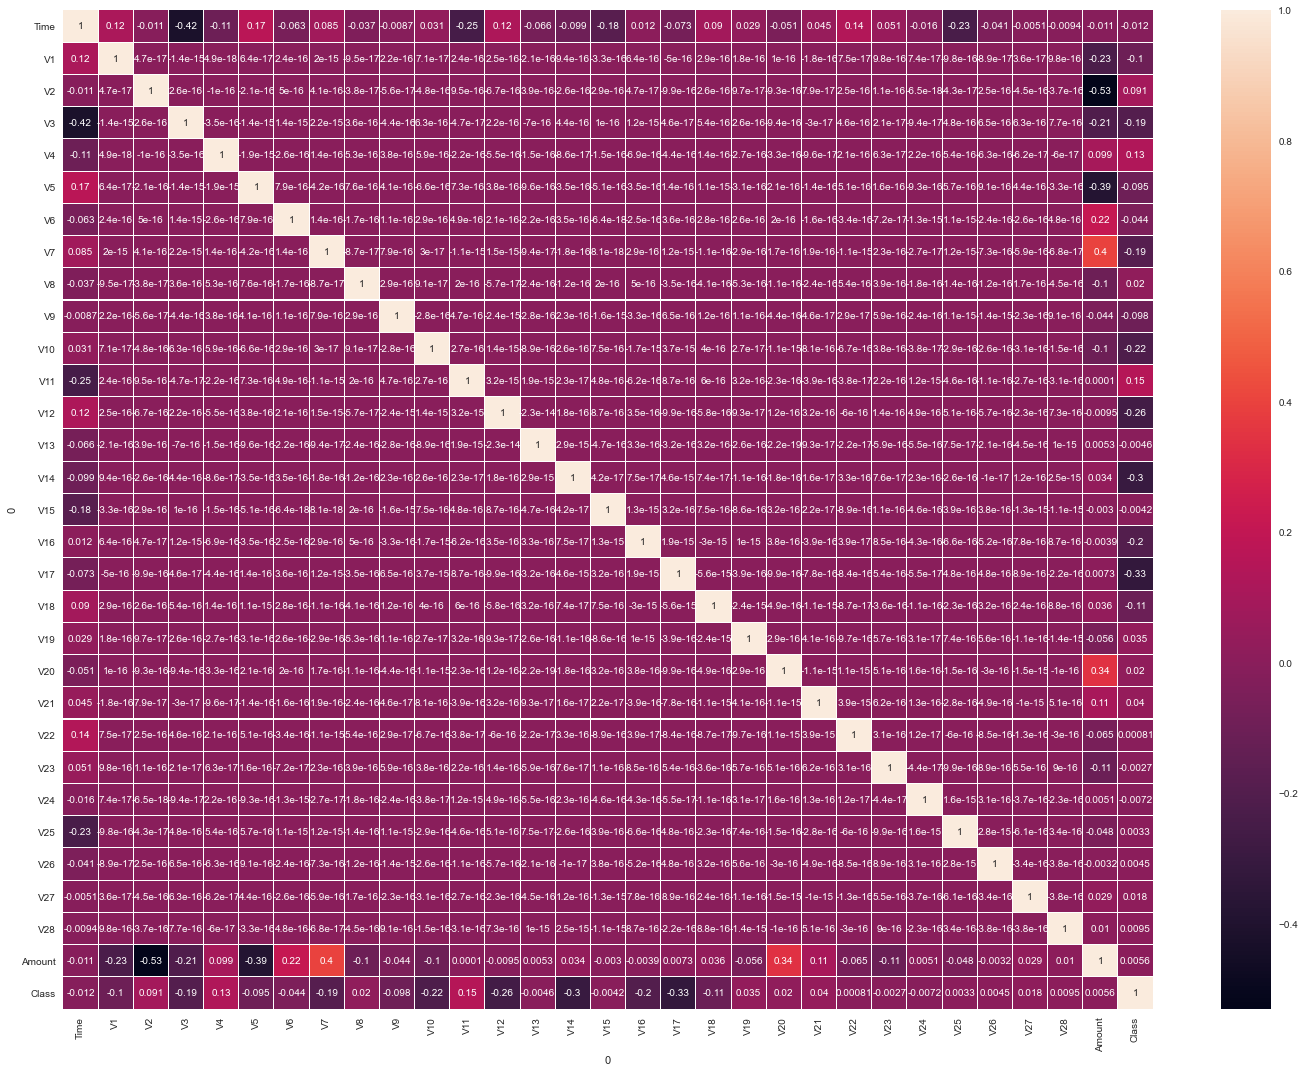

In [6]:
#Corr Plot
df_copy = df.copy()
df_copy = df_copy.astype('float')

corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            linewidths=.1, ax=ax, annot=True)
plt.tight_layout()

# Data Splitting<a class="anchor" id="STEP_3"></a>

In [4]:
# split into training and testing datasets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=.5, random_state=425)
# split training set again into training and validation set
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain,Ytrain, 
                                              test_size=.2, random_state=425)

In [5]:
df1 = Ytrain.loc[df['Class'].isin(['1'])]
print(len(df1))

41


In [6]:
Xtrain, Xval, Xtest = Xtrain.values, Xval.values, Xtest.values
Ytrain = Ytrain.values.ravel().astype('int')
Yval = Yval.values.ravel().astype('int')
Ytest = Ytest.values.ravel().astype('int')

In [7]:
print(Xtrain.shape) #training samples
print(Xval.shape) #validation sample to choose the best model
print(Xtest.shape) #testing sample

(113922, 29)
(28481, 29)
(142404, 29)


# Model Selection<a class="anchor" id="STEP_4"></a>

### 1. Linear Classification<a class="anchor" id="PART_1"></a>

#### 1.1 Ridge Classifier <a class="anchor" id="section_1_1"></a> 

The alpha giving the best AUC is 1.6


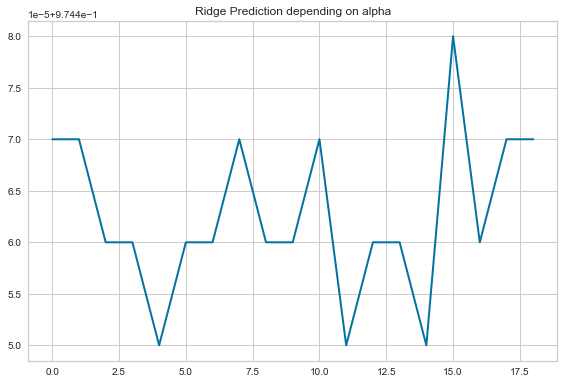

In [8]:
########RidgeClassifier using the sklearn, finding the best learning rate #######
alpha = np.arange(0.1,2,0.1)
ridge_score = []

for a in alpha:
    model_ridge =  RidgeClassifier(alpha=a, solver='saga').fit(Xtrain, Ytrain)
    score_val = model_ridge.decision_function(Xval)  
    fpr, tpr, thresholds = roc_curve(Yval, score_val)
    ridge_score.append(np.around(auc(fpr, tpr),5))
    

# plot the AUC graph
plt.plot(ridge_score,lw=2)
plt.title("Ridge Prediction depending on alpha", size = 12)
plt.tight_layout()

# get the optimal alpha
print("The alpha giving the best AUC is",alpha[ridge_score.index(np.max(ridge_score))])

In [9]:
# So we choose alpha=1.6
model_ridge =  RidgeClassifier(alpha=1.6, solver='saga').fit(Xtrain, Ytrain) 
print('Validation score from RidgeClassifier: ', model_ridge.score(Xval,Yval))

Validation score from RidgeClassifier:  0.9988764439450862


In [10]:
# for testing sample
score_ridge = model_ridge.decision_function(Xtest)                  
Ypred_ridge = model_ridge.predict(Xtest)

RidgeClassifier Model AUC for testing set: 0.9790540054509203


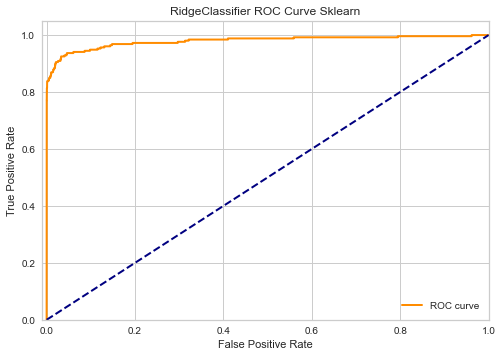

In [11]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_ridge)
auc_ridge = auc(fpr, tpr)
print('RidgeClassifier Model AUC for testing set: {}'.format(auc_ridge))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RidgeClassifier ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

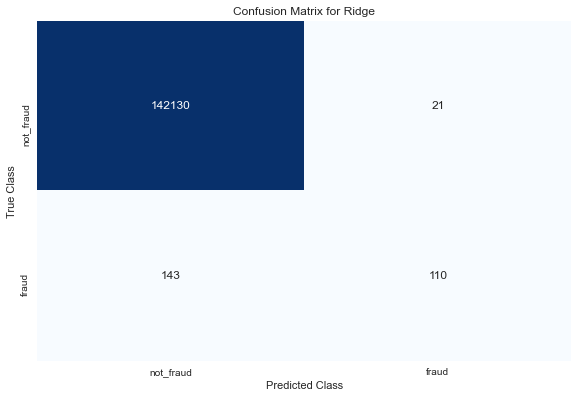

In [12]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_ridge = confusion_matrix(Ytest, Ypred_ridge)
dataframe = pd.DataFrame(matrix_ridge, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for Ridge"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [13]:
print('We have detected ' + str(matrix_ridge[1][1]) + ' frauds / ' + 
      str(matrix_ridge[1][1]+matrix_ridge[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_ridge[1][1]/(matrix_ridge[1][1]+matrix_ridge[1][0])))
print("the accuracy is : "+ str((matrix_ridge[0][0] + matrix_ridge[1][1]) / 
                                (sum(matrix_ridge[0]) + sum(matrix_ridge[1]))))

We have detected 110 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.43478260869565216
the accuracy is : 0.9988483469565461


In [14]:
print(classification_report(Ytest, Ypred_ridge))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.84      0.43      0.57       253

    accuracy                           1.00    142404
   macro avg       0.92      0.72      0.79    142404
weighted avg       1.00      1.00      1.00    142404



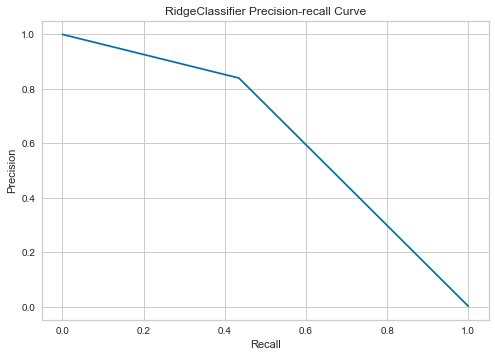

In [15]:
precision, recall, _ = precision_recall_curve(Ytest, Ypred_ridge)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("RidgeClassifier Precision-recall Curve")
plt.show()

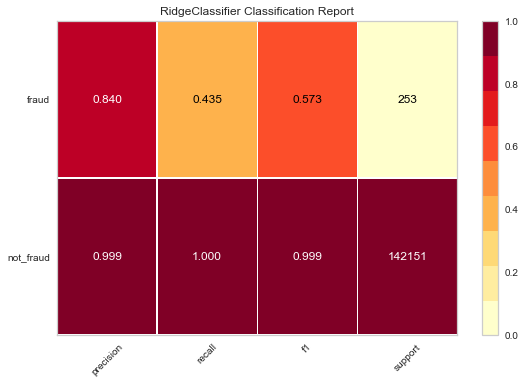

In [16]:
visualizer_ridge = ClassificationReport(model_ridge, classes = class_names, 
                                        support = True)
visualizer_ridge.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer_ridge.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer_ridge.show()

In [17]:
# evaluation
# calculate average error and standard deviation
testYDiff_ridge = np.abs(Ytest-Ypred_ridge)
avgErr_ridge = np.mean(testYDiff_ridge)
stdErr_ridge = np.std(testYDiff_ridge)

print('RidgeClassifier average error: {} ({})'.format(avgErr_ridge, stdErr_ridge))

RidgeClassifier average error: 0.0011516530434538355 (0.03391646707310977)


#### 1.2 SGDClassifier( Regularized Linear) <a class="anchor" id="section_1_2"></a> 

The alpha giving the best AUC is 0.001


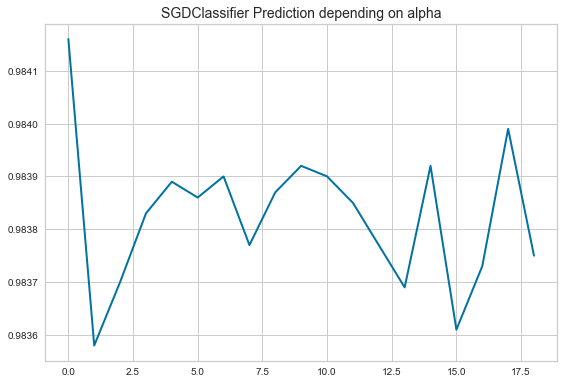

In [18]:
# regularized linear models with stochastic gradient descent (SGD)
# loss = "log" == logistic so not choosing it
########SGDClassifier using the sklearn, finding the best learning rate #######
alpha = np.arange(0.001, 0.02, 0.001) 
sgd_score = []

for num in alpha:
    model_sgd = SGDClassifier(alpha = num, max_iter=10000).fit(Xtrain,Ytrain)
    score_val = model_sgd.decision_function(Xval)
    fpr, tpr, thresholds = roc_curve(Yval, score_val)
    sgd_score.append(np.around(auc(fpr, tpr),5))

# plot the AUC graph
plt.plot(sgd_score,lw=2)
plt.title("SGDClassifier Prediction depending on alpha", size = 14)
plt.tight_layout()

# get the optimal alpha
print("The alpha giving the best AUC is", alpha[sgd_score.index(np.max(sgd_score))])

In [19]:
#from above plot, we can say that the best alpha it gives us is 0.001.
model_sgd =  SGDClassifier(alpha = 0.001, max_iter=10000).fit(Xtrain,Ytrain)
print('Validation score from SGDClassifier: ', model_sgd.score(Xval,Yval))

Validation score from SGDClassifier:  0.9989466661985184


In [20]:
# Prediction on test data
score_sgd = model_sgd.decision_function(Xtest)
Ypred_sgd = model_sgd.predict(Xtest)

SGDClassifier Model AUC for testing set: 0.9851334672980241


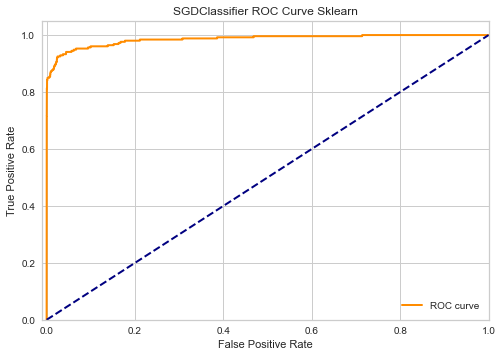

In [21]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_sgd)
auc_sgd = auc(fpr, tpr)
print('SGDClassifier Model AUC for testing set: {}'.format(auc_sgd))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGDClassifier ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

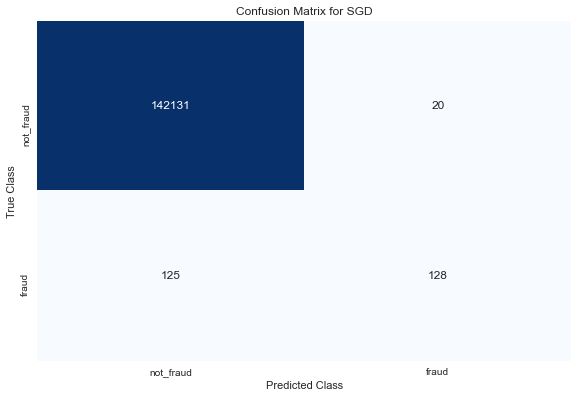

In [22]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_sgd = confusion_matrix(Ytest, Ypred_sgd)
dataframe = pd.DataFrame(matrix_sgd, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for SGD"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [23]:
print('We have detected ' + str(matrix_sgd[1][1]) + ' frauds / ' + 
      str(matrix_sgd[1][1]+matrix_sgd[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_sgd[1][1]/(matrix_sgd[1][1]+matrix_sgd[1][0])))
print("the accuracy is : "+ str((matrix_sgd[0][0] + matrix_sgd[1][1]) / 
                                (sum(matrix_sgd[0]) + sum(matrix_sgd[1]))))

We have detected 128 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.5059288537549407
the accuracy is : 0.9989817701749951


In [24]:
print(classification_report(Ytest, Ypred_sgd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.86      0.51      0.64       253

    accuracy                           1.00    142404
   macro avg       0.93      0.75      0.82    142404
weighted avg       1.00      1.00      1.00    142404



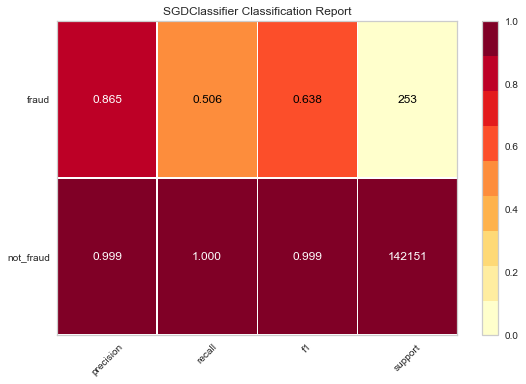

In [25]:
visualizer_sgd = ClassificationReport(model_sgd, classes = class_names, 
                                        support = True)
visualizer_sgd.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer_sgd.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer_sgd.show()

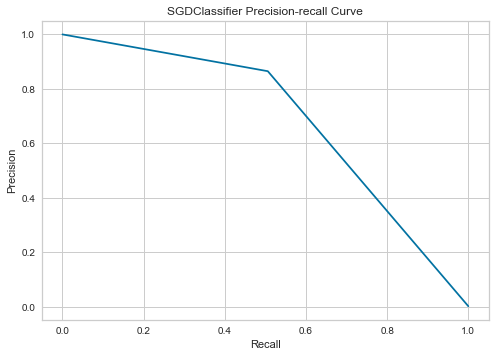

In [26]:
precision, recall, _ = precision_recall_curve(Ytest, Ypred_sgd)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("SGDClassifier Precision-recall Curve")
plt.show()

In [27]:
# evaluation
# calculate average error and standard deviation
testYDiff_sgd = np.abs(Ytest-Ypred_sgd)
avgErr_sgd = np.mean(testYDiff_sgd)
stdErr_sgd = np.std(testYDiff_sgd)

print('SGDClassifier average error: {} ({})'.format(avgErr_sgd, stdErr_sgd))

SGDClassifier average error: 0.0010182298250049156 (0.03189346379790671)


#### 1.3 LASSO <a class="anchor" id="section_1_3"></a> 

The alpha giving the best AUC is 0.0013000000000000004


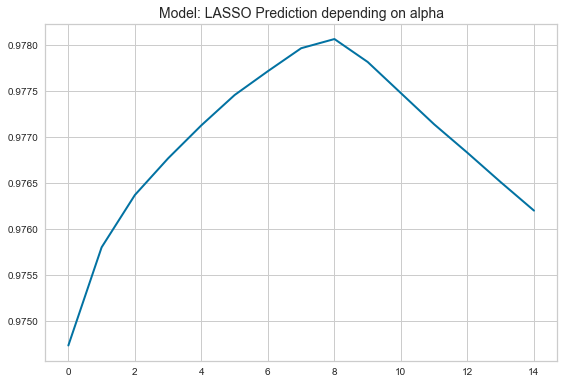

In [28]:
########ElasticNet using the sklearn, finding the best learning rate #######
alpha = np.arange(0.0005, 0.002, 0.0001) 
lasso_score = []

for a in alpha:
    model_lasso = ElasticNet(l1_ratio = 1,alpha = a,
                             max_iter=10000).fit(Xtrain, Ytrain)
    score_val = model_lasso.predict(Xval) # it gives probability
    fpr, tpr, thresholds = roc_curve(Yval, score_val)
    lasso_score.append(np.around(auc(fpr, tpr),5))

# plot the AUC graph
plt.plot(lasso_score,lw=2)
plt.title("Model: LASSO Prediction depending on alpha", size = 14)
plt.tight_layout()

# get the optimal alpha
print("The alpha giving the best AUC is",alpha[lasso_score.index(np.max(lasso_score))])

In [29]:
#from above plot, we can say that the best alpha it gives us is 0.0013.
model_lasso = ElasticNet(l1_ratio=1,alpha=0.0013,max_iter=10000).fit(Xtrain, Ytrain)
print('Validation score from LASSO: ', model_lasso.score(Xval,Yval))

Validation score from LASSO:  0.5090500728746152


In [30]:
# Prediction on test data
score_lasso = model_lasso.predict(Xtest)
Ypred_lasso = [round(i) for i in score_lasso]

LASSO Model AUC for testing set: 0.9736452939051645


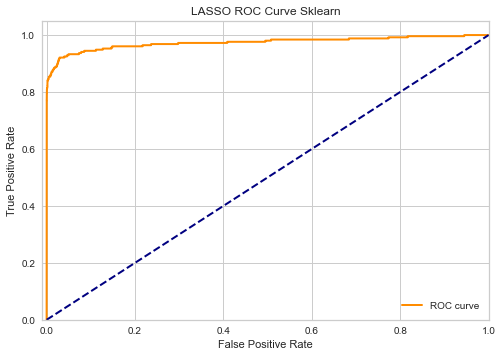

In [31]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_lasso)
auc_lasso = auc(fpr, tpr)
print('LASSO Model AUC for testing set: {}'.format(auc_lasso))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LASSO ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

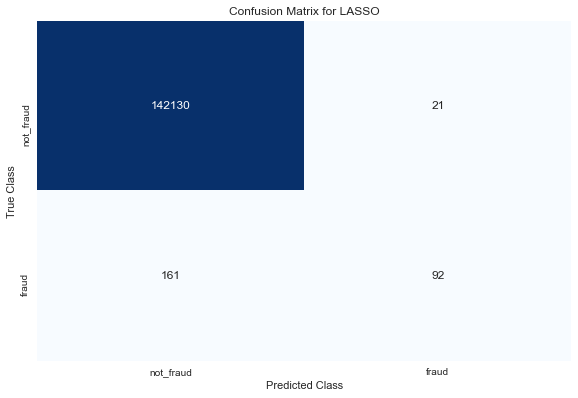

In [32]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_lasso = confusion_matrix(Ytest, Ypred_lasso)
dataframe = pd.DataFrame(matrix_lasso, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for LASSO"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [33]:
print('We have detected ' + str(matrix_lasso[1][1]) + ' frauds / ' + 
      str(matrix_lasso[1][1]+matrix_lasso[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_lasso[1][1]/(matrix_lasso[1][1]+matrix_lasso[1][0])))
print("the accuracy is : "+ str((matrix_lasso[0][0] + matrix_lasso[1][1]) / 
                                (sum(matrix_lasso[0]) + sum(matrix_lasso[1]))))

We have detected 92 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.36363636363636365
the accuracy is : 0.9987219460127524


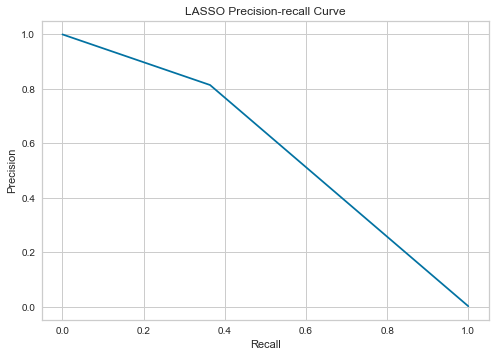

In [34]:
precision, recall, _ = precision_recall_curve(Ytest, Ypred_lasso)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LASSO Precision-recall Curve")
plt.show()

In [35]:
print(classification_report(Ytest, Ypred_lasso))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.81      0.36      0.50       253

    accuracy                           1.00    142404
   macro avg       0.91      0.68      0.75    142404
weighted avg       1.00      1.00      1.00    142404



In [36]:
# evaluation
# calculate average error and standard deviation
testYDiff_lasso = np.abs(Ytest-Ypred_lasso)
avgErr_lasso = np.mean(testYDiff_lasso)
stdErr_lasso = np.std(testYDiff_lasso)

print('LASSO average error: {} ({})'.format(avgErr_lasso, stdErr_lasso))

LASSO average error: 0.0012780539872475493 (0.03572702849738878)


#### 1.4 Linear Discriminant Analysis <a class="anchor" id="section_1_4"></a> 

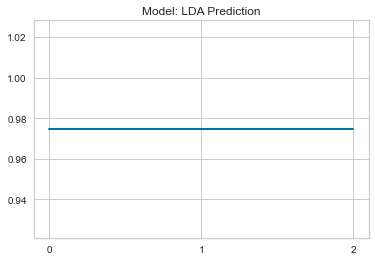

The solver giving the best AUC is svd


In [39]:
##################using the sklearn model, finding the best solver#################
solvers = ['svd', 'lsqr', 'eigen']
lda_score = []

for sol in solvers:
    model_lda = LinearDiscriminantAnalysis(solver=sol).fit(Xtrain, Ytrain)
    score_val = model_lda.predict_proba(Xval)[:,1] 
    fpr, tpr, thresholds = roc_curve(Yval, score_val)
    lda_score.append(np.around(auc(fpr, tpr),5))
    
# plot the AUC graph
plt.plot(lda_score,lw=2)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("Model: LDA Prediction")
plt.show()

# get the optimal alpha
print("The solver giving the best AUC is",solvers[lda_score.index(np.max(lda_score))])

In [40]:
#from above plot, we just choose the most common one "svd".
model_lda = LinearDiscriminantAnalysis(solver='svd').fit(Xtrain, Ytrain)
print('Validation score from LDA: ', model_lda.score(Xval,Yval))

Validation score from LDA:  0.9994382219725431


In [41]:
# Prediction on test data
score_lda = model_lda.predict_proba(Xtest)[:,1]
Ypred_lda = model_lda.predict(Xtest)

LDA Model AUC for testing set: 0.983246646672526


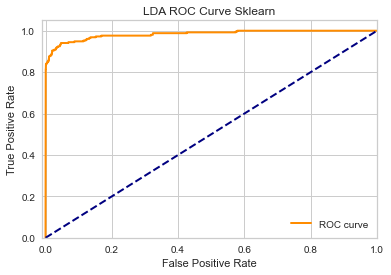

In [48]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_lda)
auc_lda = auc(fpr, tpr)
print('LDA Model AUC for testing set: {}'.format(auc_lda))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

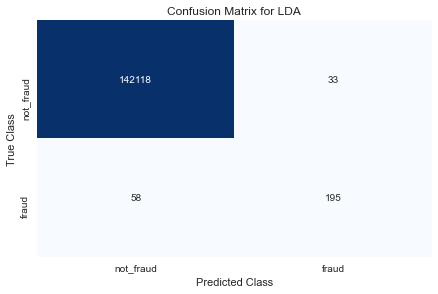

In [43]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_lda = confusion_matrix(Ytest, Ypred_lda)
dataframe = pd.DataFrame(matrix_lda, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for LDA"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [44]:
print('We have detected ' + str(matrix_lda[1][1]) + ' frauds / ' + 
      str(matrix_lda[1][1]+matrix_lda[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_lda[1][1]/(matrix_lda[1][1]+matrix_lda[1][0])))
print("the accuracy is : "+ str((matrix_lda[0][0] + matrix_lda[1][1]) / 
                                (sum(matrix_lda[0]) + sum(matrix_lda[1]))))

We have detected 195 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.7707509881422925
the accuracy is : 0.9993609730063763


In [45]:
print(classification_report(Ytest, Ypred_lda))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.86      0.77      0.81       253

    accuracy                           1.00    142404
   macro avg       0.93      0.89      0.91    142404
weighted avg       1.00      1.00      1.00    142404



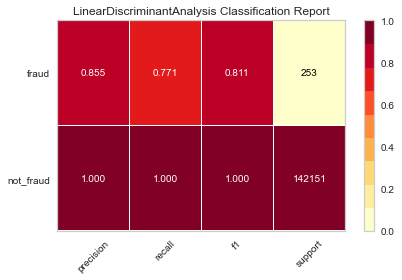

In [46]:
visualizer_lda = ClassificationReport(model_lda, classes = class_names, 
                                        support = True)
visualizer_lda.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer_lda.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer_lda.show()

In [47]:
# evaluation
# calculate average error and standard deviation
testYDiff_lda = np.abs(Ytest-Ypred_lda)
avgErr_lda = np.mean(testYDiff_lda)
stdErr_lda = np.std(testYDiff_lda)

print('LASSO average error: {} ({})'.format(avgErr_lda, stdErr_lda))

LASSO average error: 0.0006390269936237746 (0.025270904972422226)


#### Finding Best Linear Classification Model <a class="anchor" id=section_1_5></a>

##### AUC Score <a class="anchor" id=section_1_5_1></a> 

In [49]:
auc_linear = pd.DataFrame({
    'Model': ['RidgeClassifier', 'SGDClassifier', 'LASSO','LDA'],
    'AUC Score': [auc_ridge, auc_sgd, auc_lasso, auc_lda]})

auc_linear.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
1,SGDClassifier,0.985133
3,LDA,0.983247
0,RidgeClassifier,0.979054
2,LASSO,0.973645


##### Precision <a class="anchor" id=section_1_5_2></a> 

In [50]:
precision_ridge = matrix_ridge[1][1]/(matrix_ridge[1][1]+matrix_ridge[0][1])
precision_sgd = matrix_sgd[1][1]/(matrix_sgd[1][1]+matrix_sgd[0][1])
precision_lasso = matrix_lasso[1][1]/(matrix_lasso[1][1]+matrix_lasso[0][1])
precision_lda = matrix_lda[1][1]/(matrix_lda[1][1]+matrix_lda[0][1])

precision_linear = pd.DataFrame({
    'Model': ['RidgeClassifier', 'SGDClassifier', 'LASSO', 'LDA'],
    'Precision': [precision_ridge, precision_sgd, precision_lasso, precision_lda]})

precision_linear.sort_values(by='Precision', ascending=False)

,Model,Precision
1,SGDClassifier,0.864865
3,LDA,0.855263
0,RidgeClassifier,0.839695
2,LASSO,0.814159


##### Recall<a class="anchor" id=section_1_5_3></a> 

In [51]:
recall_ridge = matrix_ridge[1][1]/(matrix_ridge[1][1]+matrix_ridge[1][0])
recall_sgd = matrix_sgd[1][1]/(matrix_sgd[1][1]+matrix_sgd[1][0])
recall_lasso = matrix_lasso[1][1]/(matrix_lasso[1][1]+matrix_lasso[1][0])
recall_lda = matrix_lda[1][1]/(matrix_lda[1][1]+matrix_lda[1][0])

recall_linear = pd.DataFrame({
    'Model': ['RidgeClassifier', 'SGDClassifier', 'LASSO','LDA'],
    'Recall': [recall_ridge, recall_sgd, recall_lasso,recall_lda]})

recall_linear.sort_values(by='Recall', ascending=False)

,Model,Recall
3,LDA,0.770751
1,SGDClassifier,0.505929
0,RidgeClassifier,0.434783
2,LASSO,0.363636


###### Conclusion---Best linear Model

So we would think that **LinearDiscriminantAnalysis** is the best among these three linear models.



In [52]:
acc_lda = (matrix_lda[0][0] + matrix_lda[1][1])/(sum(matrix_lda[0])+sum(matrix_lda[1]))

linear_model = pd.DataFrame({
    'Model': ['LinearDiscriminantAnalysis'],
    'AUC Score': [auc_lda],
    'Recall': [recall_lda],
    'Precision': [precision_lda],
    'Accuracy': [acc_lda]
})

display(linear_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,LinearDiscriminantAnalysis,0.983247,0.770751,0.855263,0.999361


<br>

### 2. Logistic Regression <a class="anchor" id="PART_2"></a>

#### 2.1 Simple Logistic Regression <a class="anchor" id="section_2_1"></a> 

In [46]:
###############Logistic regression using the sklearn ###################
model = LogisticRegression()
model.fit(Xtrain, Ytrain)
print('Validation score: ', model.score(Xval,Yval))

Validation score:  0.9992275552122467


In [47]:
prediction = model.predict(Xval)
r2_score(Yval, prediction)

0.5103374439286664

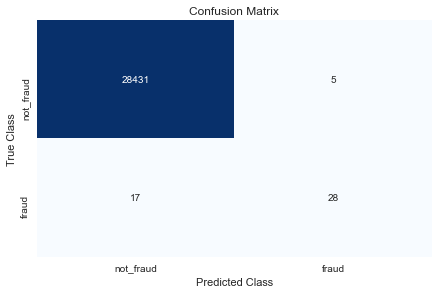

In [48]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [49]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + 
      str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+ str((matrix[0][0]+matrix[1][1]) / 
                                (sum(matrix[0]) + sum(matrix[1]))))

We have detected 28 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.6222222222222222
the accuracy is : 0.9992275552122467


In [51]:
print(classification_report(Yval, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.85      0.62      0.72        45

    accuracy                           1.00     28481
   macro avg       0.92      0.81      0.86     28481
weighted avg       1.00      1.00      1.00     28481



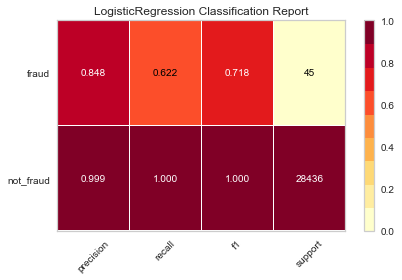

In [52]:
visualizer = ClassificationReport(model, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()

In [53]:
# evaluation
# calculate average error and standard deviation
testYDiff = np.abs(Yval-prediction)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.000772444787753239 (0.027782154646519258)


Logistic Regression AUC: 0.9631390569075193


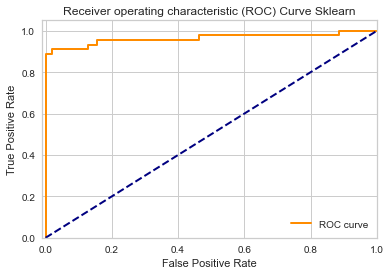

In [54]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Sklearn')
plt.legend(loc="lower right")
plt.show()


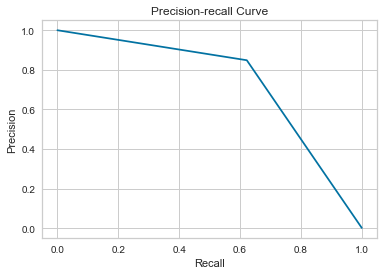

In [55]:
precision, recall, _ = precision_recall_curve(Yval, model.predict(Xval))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.show()


#### 2.2 Logistic regression -- with Ridge Penalization, solver = "sag"<a class="anchor" id=section_2_2></a> 

In [57]:
###############Logistic regression -- with Ridge Penalization ###################
##regression with L2 regularization
model_ridge = LogisticRegression(penalty = "l2",solver = "sag")
model_ridge.fit(Xtrain, Ytrain)
print('Validation score: ', model_ridge.score(Xval,Yval))

Validation score:  0.9992626663389628


In [58]:
prediction_ridge = model_ridge.predict(Xval)
r2_score(Yval, prediction_ridge)

0.5325948328409997

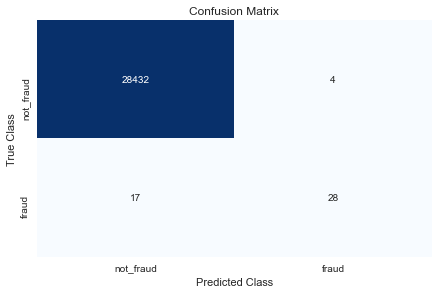

In [59]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction_ridge)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [60]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + 
      str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+str((matrix[0][0]+matrix[1][1]) / 
                               (sum(matrix[0]) + sum(matrix[1]))))

We have detected 28 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.6222222222222222
the accuracy is : 0.9992626663389628


In [61]:
print(classification_report(Yval, prediction_ridge))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.88      0.62      0.73        45

    accuracy                           1.00     28481
   macro avg       0.94      0.81      0.86     28481
weighted avg       1.00      1.00      1.00     28481



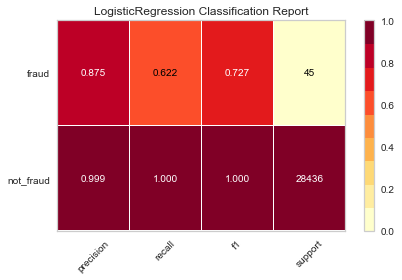

In [62]:
visualizer = ClassificationReport(model_ridge, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()

In [63]:
# evaluation
# calculate average error and standard deviation
testYDiff = np.abs(Yval-prediction_ridge)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.0007373336610371826 (0.027143875922746998)


Logistic Regression AUC: 0.975684187493162


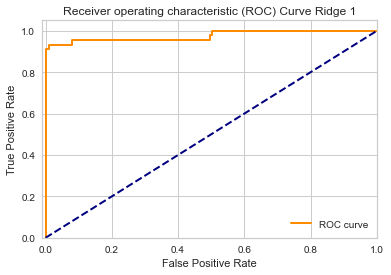

In [64]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model_ridge.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Ridge 1')
plt.legend(loc="lower right")
plt.show()

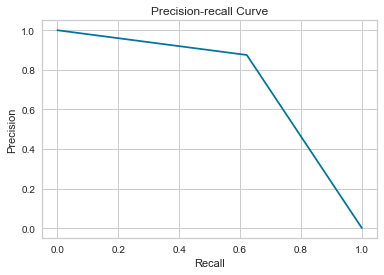

In [65]:
precision, recall, _ = precision_recall_curve(Yval, model_ridge.predict(Xval))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.show()


####  2.3 Logistic regression -- with Ridge Penalization, solver = "liblinear" <a class="anchor" id=section_2_3></a> 

In [66]:
###############Logistic regression -- with Ridge Penalization ###################
#regression with L2 regularization
model_ridge2 = LogisticRegression(penalty = "l2",solver = "liblinear")
model_ridge2.fit(Xtrain, Ytrain)
print('Validation score: ', model_ridge2.score(Xval,Yval))

Validation score:  0.9991924440855307


In [67]:
prediction_ridge2 = model_ridge2.predict(Xval)
r2_score(Yval, prediction_ridge2)

0.4880800550163331

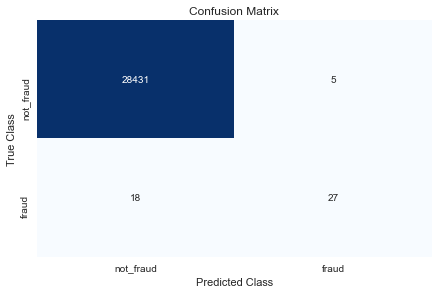

In [68]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction_ridge2)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [69]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + 
      str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+str((matrix[0][0]+matrix[1][1]) / 
                               (sum(matrix[0]) + sum(matrix[1]))))

We have detected 27 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.6
the accuracy is : 0.9991924440855307


In [70]:
print(classification_report(Yval, prediction_ridge2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.84      0.60      0.70        45

    accuracy                           1.00     28481
   macro avg       0.92      0.80      0.85     28481
weighted avg       1.00      1.00      1.00     28481



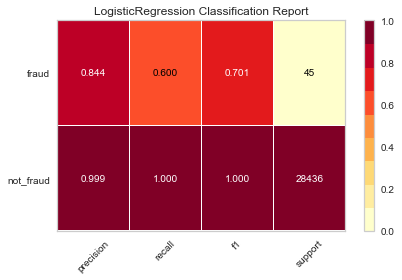

In [71]:
visualizer = ClassificationReport(model_ridge2, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()

In [72]:
# evaluation
# calculate average error and standard deviation
testYDiff = np.abs(Yval-prediction_ridge2)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.0008075559144692953 (0.02840605160725969)


Logistic Regression AUC: 0.9646137134461794


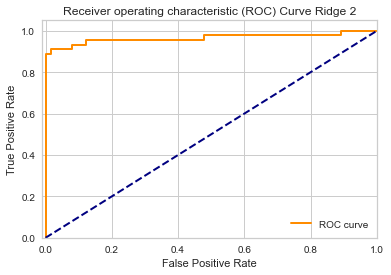

In [73]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model_ridge2.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Ridge 2')
plt.legend(loc="lower right")
plt.show()

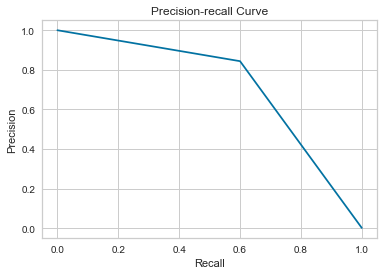

In [74]:
precision, recall, _ = precision_recall_curve(Yval, model_ridge2.predict(Xval))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.show()


#### 2.4 Logistic regression -- with Lasso Penalization, solver = "liblinear" <a class="anchor" id=section_2_4></a> 

In [75]:
###############Logistic regression -- with Lasso Penalization ###################
#regression with L1 regularization
model_lasso = LogisticRegression(penalty = "l1",solver = "liblinear")
model_lasso.fit(Xtrain, Ytrain)
print('Validation score: ', model_lasso.score(Xval,Yval))


Validation score:  0.9991573329588147


In [76]:
prediction_lasso = model_lasso.predict(Xval)
r2_score(Yval, prediction_lasso)

0.4658226661039997

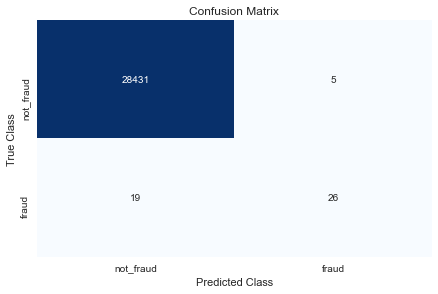

In [77]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction_lasso)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [78]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+str((matrix[0][0]+matrix[1][1]) / (sum(matrix[0]) + sum(matrix[1]))))

We have detected 26 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.5777777777777777
the accuracy is : 0.9991573329588147


In [79]:
print(classification_report(Yval, prediction_lasso))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.84      0.58      0.68        45

    accuracy                           1.00     28481
   macro avg       0.92      0.79      0.84     28481
weighted avg       1.00      1.00      1.00     28481



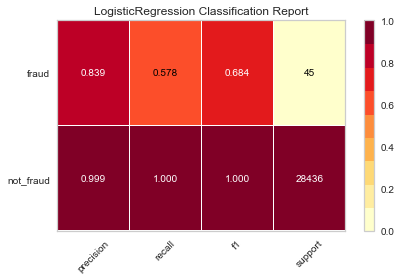

In [80]:
visualizer = ClassificationReport(model_lasso, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()

In [81]:
# evaluation
# calculate average error and standard deviation


testYDiff = np.abs(Yval-prediction_lasso)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.0008426670411853516 (0.029016494506453595)


Logistic Regression AUC: 0.9643706725434114


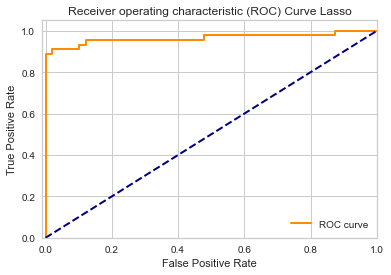

In [82]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model_lasso.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Lasso')
plt.legend(loc="lower right")
plt.show()

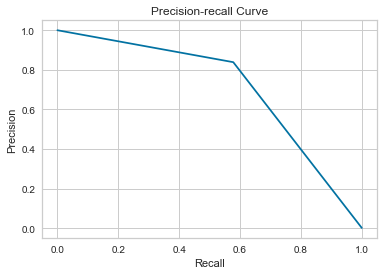

In [84]:
precision, recall, _ = precision_recall_curve(Yval, model_lasso.predict(Xval))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.show()

#### 2.5 Logistic regression -- with Lasso Penalization, solver = "saga" <a class="anchor" id=section_2_5></a> 

In [85]:
###############Logistic regression -- with Lasso Penalization ###################
#regression with L1 regularization
model_lasso2 = LogisticRegression(penalty = "l1",solver = "saga")
model_lasso2.fit(Xtrain, Ytrain)
print('Validation score: ', model_lasso2.score(Xval,Yval))

Validation score:  0.9992626663389628


In [86]:
prediction_lasso2 = model_lasso2.predict(Xval)
r2_score(Yval, prediction_lasso2)

0.5325948328409997

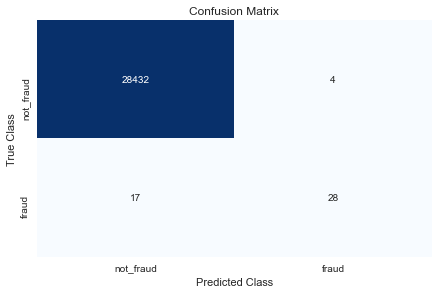

In [87]:
prediction_lasso2 = model_lasso2.predict(Xval)

class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction_lasso2)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [88]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + 
      str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+str((matrix[0][0]+matrix[1][1]) / 
                               (sum(matrix[0]) + sum(matrix[1]))))

We have detected 28 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.6222222222222222
the accuracy is : 0.9992626663389628


In [89]:
print(classification_report(Yval, prediction_lasso2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.88      0.62      0.73        45

    accuracy                           1.00     28481
   macro avg       0.94      0.81      0.86     28481
weighted avg       1.00      1.00      1.00     28481



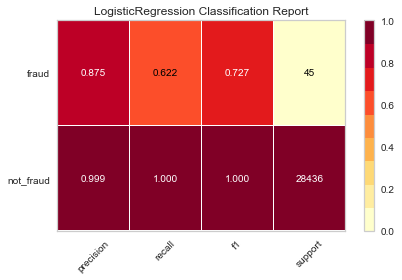

In [90]:
visualizer = ClassificationReport(model_lasso2, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()

In [91]:
# evaluation
# calculate average error and standard deviation


testYDiff = np.abs(Yval-prediction_lasso2)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.0007373336610371826 (0.027143875922746998)


Logistic Regression AUC: 0.9773221737703381


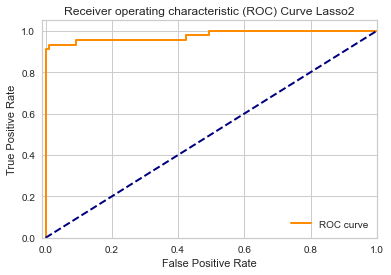

In [92]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model_lasso2.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Lasso2')
plt.legend(loc="lower right")
plt.show()

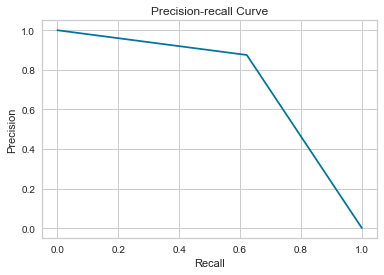

In [93]:
precision, recall, _ = precision_recall_curve(Yval, model_lasso2.predict(Xval))
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.show()

#### 2.6 Logistic regression -- with Elastic Net Penalization <a class="anchor" id=section_2_6></a> 

In [94]:
###############Logistic regression -- with Elastic Net Penalization ###################
model_en = LogisticRegression(penalty = "elasticnet",solver = "saga", l1_ratio =0.425)
model_en.fit(Xtrain, Ytrain)
print('Validation score: ', model_en.score(Xval,Yval))

Validation score:  0.9992626663389628


In [95]:
prediction_en = model_en.predict(Xval)
r2_score(Yval, prediction_en)

0.5325948328409997

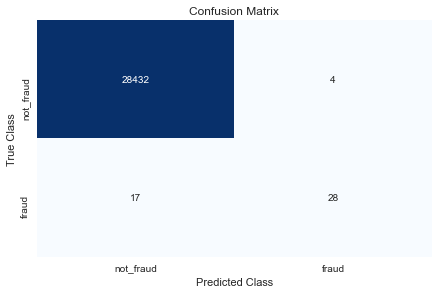

In [96]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(Yval, prediction_en)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [97]:
print('We have detected ' + str(matrix[1][1]) + ' frauds / ' + 
      str(matrix[1][1]+matrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix[1][1]/(matrix[1][1]+matrix[1][0])))
print("the accuracy is : "+str((matrix[0][0]+matrix[1][1]) / 
                               (sum(matrix[0]) + sum(matrix[1]))))

We have detected 28 frauds / 45 total frauds.

So, the probability to detect a fraud is 0.6222222222222222
the accuracy is : 0.9992626663389628


In [98]:
print(classification_report(Yval, prediction_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.88      0.62      0.73        45

    accuracy                           1.00     28481
   macro avg       0.94      0.81      0.86     28481
weighted avg       1.00      1.00      1.00     28481



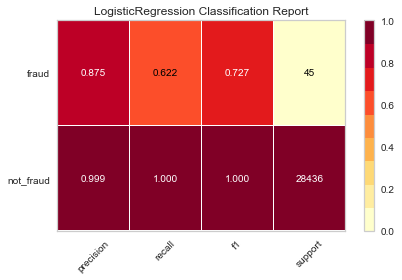

In [99]:
visualizer = ClassificationReport(model_en, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xval, Yval)        # Evaluate the model on the test data
visualizer.show()        

In [100]:
# evaluation
# calculate average error and standard deviation
testYDiff = np.abs(Yval-prediction_en)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('Logistic regression average error: {} ({})'.format(avgErr, stdErr))

Logistic regression average error: 0.0007373336610371826 (0.027143875922746998)


Logistic Regression AUC: 0.9772018255419578


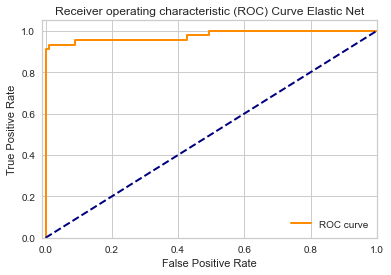

In [101]:
#AUC CURVE
fpr2, tpr2, thresholds = roc_curve(Yval, model_en.predict_proba(Xval)[:,1])
print('Logistic Regression AUC: {}'.format(auc(fpr2, tpr2)))

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Elastic Net')
plt.legend(loc="lower right")
plt.show()

#### Testing: Finding Best Logistic Regression Model <a class="anchor" id=section_2_7></a> 

##### AUC Score <a class="anchor" id=section_2_7_1></a> 

In [102]:
#results of validation sample
fpr2, tpr2, thresholds = roc_curve(Yval, model.predict_proba(Xval)[:,1])
fpr21, tpr21, thresholds = roc_curve(Yval, model_ridge.predict_proba(Xval)[:,1])
fpr22, tpr22, thresholds = roc_curve(Yval, model_ridge2.predict_proba(Xval)[:,1])
fpr23, tpr23, thresholds = roc_curve(Yval, model_lasso.predict_proba(Xval)[:,1])
fpr24, tpr24, thresholds = roc_curve(Yval, model_lasso2.predict_proba(Xval)[:,1])
fpr25, tpr25, thresholds = roc_curve(Yval, model_en.predict_proba(Xval)[:,1])

models = pd.DataFrame({
    'Model': ['Simple Logistic Regression', 'Ridge.1 Logistic Regression', 
              'Ridge.2 Logistic Regression', 'Lasso.1 Logistic Regression', 
              'Lasso.2 Logistic Regression', 
              'Elastic Net Logistic Regression'],
    'AUC Score': [auc(fpr2, tpr2), auc(fpr21, tpr21),auc(fpr22, tpr22), 
                  auc(fpr23, tpr23), auc(fpr24, tpr24), auc(fpr25, tpr25)]})

models.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
4,Lasso.2 Logistic Regression,0.977322
5,Elastic Net Logistic Regression,0.977202
1,Ridge.1 Logistic Regression,0.975684
2,Ridge.2 Logistic Regression,0.964614
3,Lasso.1 Logistic Regression,0.964371
0,Simple Logistic Regression,0.963139


##### Precision  <a class="anchor" id=section_2_7_2></a> 

In [103]:
precision_simple = precision_score(Yval, model.predict(Xval))
precision_ridge = precision_score(Yval, model_ridge.predict(Xval))
precision_ridge2 = precision_score(Yval, model_ridge2.predict(Xval))
precision_lasso = precision_score(Yval, model_lasso.predict(Xval))
precision_lasso2 = precision_score(Yval, model_lasso2.predict(Xval))
precision_en = precision_score(Yval, model_en.predict(Xval))

models = pd.DataFrame({
    'Model': ['Simple Logistic Regression', 'Ridge.1 Logistic Regression', 
              'Ridge.2 Logistic Regression', 'Lasso.1 Logistic Regression', 
              'Lasso2 Logistic Regression', 
              'Elastic Net Logistic Regression'],
    
    'Precision': [precision_simple,precision_ridge, precision_ridge2,
                  precision_lasso, precision_lasso2, precision_en ]})
models.sort_values(by='Precision', ascending=False)

,Model,Precision
1,Ridge.1 Logistic Regression,0.875000
4,Lasso2 Logistic Regression,0.875000
5,Elastic Net Logistic Regression,0.875000
0,Simple Logistic Regression,0.848485
2,Ridge.2 Logistic Regression,0.843750
3,Lasso.1 Logistic Regression,0.838710


##### Recall  <a class="anchor" id=section_2_7_3></a> 

In [104]:
recall_simple = recall_score(Yval, model.predict(Xval))
recall_ridge = recall_score(Yval, model_ridge.predict(Xval))
recall_ridge2 = recall_score(Yval, model_ridge2.predict(Xval))
recall_lasso = recall_score(Yval, model_lasso.predict(Xval))
recall_lasso2 = recall_score(Yval, model_lasso2.predict(Xval))
recall_en = recall_score(Yval, model_en.predict(Xval))


models = pd.DataFrame({
    'Model': ['Simple Logistic Regression', 'Ridge.1 Logistic Regression', 
              'Ridge.2 Logistic Regression', 'Lasso.1 Logistic Regression', 
              'Lasso2 Logistic Regression', 
              'Elastic Net Logistic Regression'],
    
    'Recall': [recall_simple,recall_ridge, recall_ridge2,recall_lasso, 
               recall_lasso2, recall_en ]})
models.sort_values(by='Recall', ascending=False)

,Model,Recall
0,Simple Logistic Regression,0.622222
1,Ridge.1 Logistic Regression,0.622222
4,Lasso2 Logistic Regression,0.622222
5,Elastic Net Logistic Regression,0.622222
2,Ridge.2 Logistic Regression,0.600000
3,Lasso.1 Logistic Regression,0.577778


#### Analysis: On testing Sample  <a class="anchor" id=section_2_8></a> 

In [105]:
#results over testing sample as we choose Lasso2 model as our best model
# Prediction on test data
pred_logit = model_lasso2.predict(Xtest)
score_logit = model_lasso2.predict_proba(Xtest)[:,1]

##### AUC Score <a class="anchor" id=section_2_7_1></a> 

In [106]:
fpr2, tpr2, thresholds = roc_curve(Ytest, pred_logit)
auc_logit = auc(fpr2, tpr2)
print('Logistic Model AUC for testing sample: {}'.format(auc_logit))

Logistic Model AUC for testing sample: 0.8121790993116127


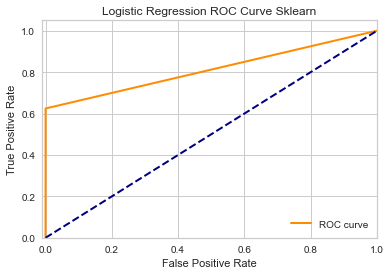

In [107]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

##### Precision&Recall<a class="anchor" id=section_2_7_2></a> 

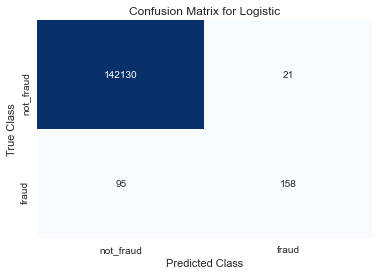

In [109]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_logit = confusion_matrix(Ytest, pred_logit)
dataframe = pd.DataFrame(matrix_logit, index=class_names, columns=class_names)

# Create heatmap
plt.figure()
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for Logistic")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [110]:
print('We have detected ' + str(matrix_logit[1][1]) + ' frauds / ' + 
      str(matrix_logit[1][1]+matrix_logit[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_logit[1][1]/(matrix_logit[1][1]+matrix_logit[1][0])))
print("the accuracy is : "+ str((matrix_logit[0][0] + matrix_logit[1][1]) / 
                                (sum(matrix_logit[0]) + sum(matrix_logit[1]))))

We have detected 158 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.6245059288537549
the accuracy is : 0.9991854161399961


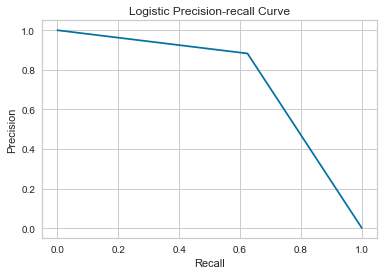

In [111]:
precision, recall, _ = precision_recall_curve(Ytest, pred_logit)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic Precision-recall Curve")
plt.show()

In [112]:
print(classification_report(Ytest, pred_logit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.88      0.62      0.73       253

    accuracy                           1.00    142404
   macro avg       0.94      0.81      0.87    142404
weighted avg       1.00      1.00      1.00    142404



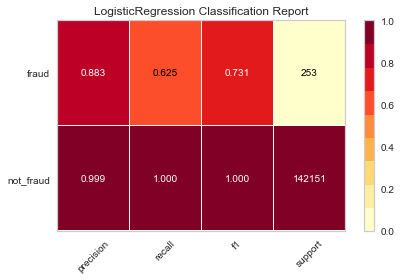

In [114]:
visualizer_logit = ClassificationReport(model_lasso2, classes = class_names, 
                                        support = True)
visualizer_logit.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer_logit.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer_logit.show()

In [117]:
# evaluation
# calculate average error and standard deviation
testYDiff_logit = np.abs(Ytest-pred_logit)
avgErr_logit = np.mean(testYDiff_logit)
stdErr_logit = np.std(testYDiff_logit)

print('Logitic Model average error: {} ({})'.format(avgErr_logit, stdErr_logit))

Logitic Model average error: 0.0008145838600039325 (0.028529288689677385)


###### Conclusion--- Best Logistic Regression Model

In [118]:
#results over testing sample
recall_logit = recall_score(Ytest, pred_logit)
precision_logit = precision_score(Ytest, pred_logit)
score_logit = model_lasso2.score(Xtest, Ytest)

logit_model = pd.DataFrame({
    'Model': ['Logistic Regression - Lasso Penalization 2'], #with solver saga
    'AUC Score': [auc_logit],
    'Recall': [recall_logit],
    'Precision': [precision_logit],
    'Accuracy': [score_logit]
})

display(logit_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,Logistic Regression - Lasso Penalization 2,0.812179,0.624506,0.882682,0.999185


### 3.K-Nearest Neighbors <a class="anchor" id="PART_3"></a>

#### Finding Best Model with different learning rate K<a class="anchor" id="section_3_1"></a> 

In [119]:
########KNeighborsClassifiers using the sklearn, finding the best k#######
knn_score = []

for i in range(1,5,1):
    model_knn =  KNeighborsClassifier(n_neighbors=i, 
                                      weights = "distance").fit(Xtrain, Ytrain)
    score_val = model_knn.predict_proba(Xval)[:,1]
    fpr, tpr, thresholds = roc_curve(Yval, score_val)
    knn_score.append(np.around(auc(fpr, tpr),5))

The alpha giving the best AUC is 4


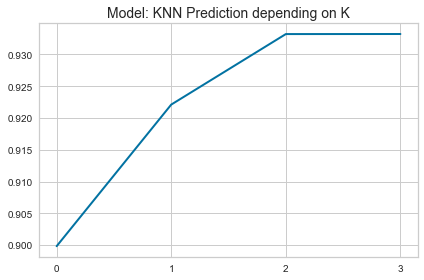

In [120]:
# plot the AUC grapp

plt.plot(knn_score,lw=2)
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.title("Model: KNN Prediction depending on K", size = 14)
plt.tight_layout()

# get the optimal alpha
print("The alpha giving the best AUC is",knn_score.index(np.max(knn_score))+1)

#### Analysis: On testing Sample  <a class="anchor" id=section_3_2></a> 

In [121]:
#from above plot, we go with K=4
model_knn =  KNeighborsClassifier(n_neighbors=4, 
                                  weights = "distance").fit(Xtrain, Ytrain)

print('Validation score from KNN: ', model_knn.score(Xval,Yval))

Validation score from KNN:  0.9995435553526912


In [122]:
# Prediction on test data
score_knn = model_knn.predict_proba(Xtest)[:,1]
Ypred_knn = model_knn.predict(Xtest)

##### AUC Score <a class="anchor" id=section_3_2_1></a> 

KNN Model AUC for testing sample: 0.9128844034163638


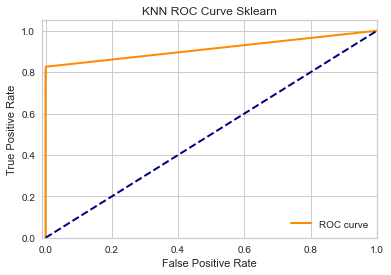

In [123]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_knn)
auc_knn = auc(fpr, tpr)
print('KNN Model AUC for testing sample: {}'.format(auc_knn))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

##### Precision&Recall <a class="anchor" id=section_3_2_2></a> 

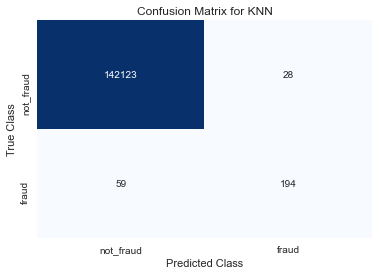

In [124]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_knn = confusion_matrix(Ytest, Ypred_knn)
dataframe = pd.DataFrame(matrix_knn, index=class_names, columns=class_names)

# Create heatmap
plt.figure()
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for KNN")
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [125]:
print('We have detected ' + str(matrix_knn[1][1]) + ' frauds / ' + 
      str(matrix_knn[1][1]+matrix_knn[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_knn[1][1]/(matrix_knn[1][1]+matrix_knn[1][0])))
print("the accuracy is : "+ str((matrix_knn[0][0] + matrix_knn[1][1]) / 
                                (sum(matrix_knn[0]) + sum(matrix_knn[1]))))

We have detected 194 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.766798418972332
the accuracy is : 0.999389062104997


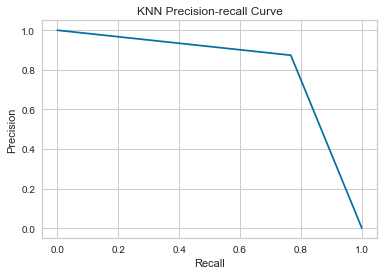

In [126]:
precision, recall, _ = precision_recall_curve(Ytest, Ypred_knn)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN Precision-recall Curve")
plt.show()

In [127]:
print(classification_report(Ytest, Ypred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.87      0.77      0.82       253

    accuracy                           1.00    142404
   macro avg       0.94      0.88      0.91    142404
weighted avg       1.00      1.00      1.00    142404



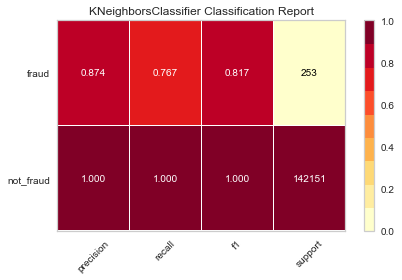

In [128]:
visualizer_knn = ClassificationReport(model_knn, classes = class_names, 
                                        support = True)
visualizer_knn.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer_knn.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer_knn.show()

In [129]:
# evaluation
# calculate average error and standard deviation
testYDiff_knn = np.abs(Ytest-Ypred_knn)
avgErr_knn = np.mean(testYDiff_knn)
stdErr_knn = np.std(testYDiff_knn)

print('KNN average error: {} ({})'.format(avgErr_knn, stdErr_knn))

KNN average error: 0.0006109378950029493 (0.024709606429310017)


###### conclusion---Best KNN Model

In [130]:
precision_knn = matrix_knn[1][1]/(matrix_knn[1][1]+matrix_knn[0][1])
recall_knn = matrix_knn[1][1]/(matrix_knn[1][1]+matrix_knn[1][0])
acc_knn = (matrix_knn[0][0] + matrix_knn[1][1])/(sum(matrix_knn[0])+sum(matrix_knn[1]))

knn_model = pd.DataFrame({
    'Model': ['KNearestNeighbors Model'], 
    'AUC Score': [auc_knn],
    'Recall': [recall_knn],
    'Precision': [precision_knn],
    'Accuracy': [acc_knn]
})

display(knn_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,KNearestNeighbors Model,0.912884,0.766798,0.873874,0.999389


<br>

### 4. Feed-Forward Neural Networks <a class="anchor" id=PART_4></a> 

#### 4.1 4 Models with different hyperparameters <a class="anchor" id=section_4_1></a>  
<br>

#####  Model 1

In [139]:
model1 =  keras.Sequential([
Dense(input_dim = 29, units = 256, activation = "sigmoid"),
Dense(units = 128, activation = "sigmoid"),
Dense(units = 64, activation = "sigmoid"),
Dense(units =1, activation = "sigmoid"),])

In [140]:
model1.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), 
               loss = "binary_crossentropy")
model1.fit(Xtrain.astype(np.float32), Ytrain, batch_size = 15, epochs = 10)

Epoch 1/10
7595/7595 [==============================] - 21s 3ms/step - loss: 0.0103
Epoch 2/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0085
Epoch 3/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0071
Epoch 4/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0066
Epoch 5/10
7595/7595 [==============================] - 16s 2ms/step - loss: 0.0065
Epoch 6/10
7595/7595 [==============================] - 16s 2ms/step - loss: 0.0067
Epoch 7/10
7595/7595 [==============================] - 16s 2ms/step - loss: 0.0066
Epoch 8/10
7595/7595 [==============================] - 17s 2ms/step - loss: 0.0062
Epoch 9/10
7595/7595 [==============================] - 16s 2ms/step - loss: 0.0065
Epoch 10/10
7595/7595 [==============================] - 17s 2ms/step - loss: 0.0063


In [141]:
model1.evaluate(Xval.astype(np.float32), Yval)

891/891 [==============================] - 1s 1ms/step - loss: 0.0062


0.0061766039580106735

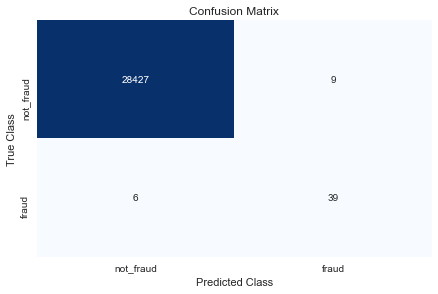

In [142]:
class_names = ['not_fraud', 'fraud']
y_pred1 = 1*(model1.predict(Xval.astype(np.float32)).flatten() >= 0.5)

matrix = confusion_matrix(Yval, y_pred1)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [143]:
fpr2, tpr2, thresholds = roc_curve(Yval, y_pred1)

print("R2 of model 1 is:", r2_score(Yval, y_pred1))
print("Accuracy of model 1 is:",np.mean(Yval == y_pred1))
print(classification_report(Yval, y_pred1))
print('Model 1 AUC: {}'.format(auc(fpr2, tpr2)))

R2 of model 1 is: 0.6661391663149998
Accuracy of model 1 is: 0.9994733330992591
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.81      0.87      0.84        45

    accuracy                           1.00     28481
   macro avg       0.91      0.93      0.92     28481
weighted avg       1.00      1.00      1.00     28481

Model 1 AUC: 0.9331750832278333


##### MODEL 2 

In [144]:
model2 =  keras.Sequential([
Dense(input_dim = 29, units = 8, activation = "relu"),
Dense(units = 10, activation = "relu"),
Dense(units = 12, activation = "relu"),
Dense(units =1, activation = "sigmoid"),])

In [145]:
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), 
               loss = "binary_crossentropy")
model2.fit(Xtrain.astype(np.float32), Ytrain, batch_size = 15, epochs = 10)

Epoch 1/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0612
Epoch 2/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0081
Epoch 3/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0098
Epoch 4/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0095
Epoch 5/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0106
Epoch 6/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0089
Epoch 7/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0081
Epoch 8/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0081
Epoch 9/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0084
Epoch 10/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0075


In [146]:
model2.evaluate(Xval.astype(np.float32), Yval)

891/891 [==============================] - 1s 1ms/step - loss: 0.0087


0.008662054315209389

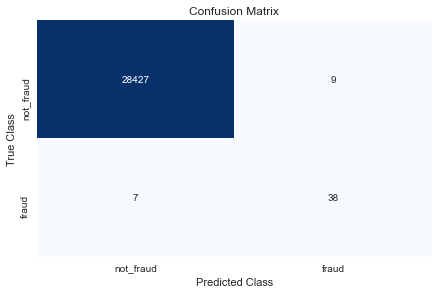

In [147]:
class_names = ['not_fraud', 'fraud']
y_pred2 = 1*(model2.predict(Xval.astype(np.float32)).flatten() >= 0.5)

matrix = confusion_matrix(Yval, y_pred2)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [148]:
fpr2, tpr2, thresholds = roc_curve(Yval, y_pred2)
print("R2 of model 2 is:", r2_score(Yval, y_pred2))
print("Accuracy of model 2 is:",np.mean(Yval == y_pred2))
print(classification_report(Yval, y_pred2))
print('Model 2 AUC: {}'.format(auc(fpr2, tpr2)))

R2 of model 2 is: 0.6438817774026665
Accuracy of model 2 is: 0.9994382219725431
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.81      0.84      0.83        45

    accuracy                           1.00     28481
   macro avg       0.90      0.92      0.91     28481
weighted avg       1.00      1.00      1.00     28481

Model 2 AUC: 0.9220639721167221


#####  MODEL 3 

In [149]:
model3 =  keras.Sequential([
Dense(input_dim = 29, units = 8, activation = "relu"),
Dense(units = 40, activation = "relu"),
Dense(units = 42, activation = "linear"),
Dense(units = 44, activation = "relu"),
Dense(units =1, activation = "sigmoid"),])

In [150]:
model3.compile(optimizer="adam", loss = "binary_crossentropy")
model3.fit(Xtrain.astype(np.float32), Ytrain, batch_size = 15, epochs = 10)

Epoch 1/10
7595/7595 [==============================] - 15s 2ms/step - loss: 0.0207
Epoch 2/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0026
Epoch 3/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0034
Epoch 4/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0040
Epoch 5/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0028
Epoch 6/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0031
Epoch 7/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0032
Epoch 8/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0032
Epoch 9/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0031
Epoch 10/10
7595/7595 [==============================] - 14s 2ms/step - loss: 0.0024


In [151]:
model3.evaluate(Xval.astype(np.float32), Yval)

891/891 [==============================] - 1s 1ms/step - loss: 0.0036


0.0035812901332974434

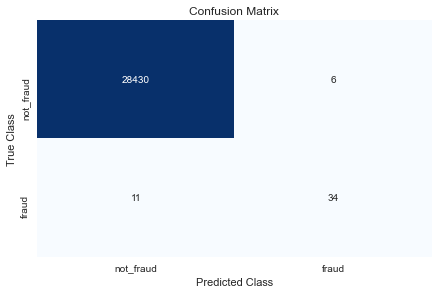

In [152]:
class_names = ['not_fraud', 'fraud']
y_pred3 = 1*(model3.predict(Xval.astype(np.float32)).flatten() >= 0.5)

matrix = confusion_matrix(Yval, y_pred3)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [153]:
fpr2, tpr2, thresholds = roc_curve(Yval, y_pred3)

print("R2 of model 3 is:", r2_score(Yval, y_pred3))
print("Accuracy of model 3 is:",np.mean(Yval == y_pred3))
print(classification_report(Yval, y_pred3))
print('Model 3 AUC: {}'.format(auc(fpr2, tpr2)))

R2 of model 3 is: 0.6216243884903332
Accuracy of model 3 is: 0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.85      0.76      0.80        45

    accuracy                           1.00     28481
   macro avg       0.92      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481

Model 3 AUC: 0.8776722777074444


##### MODEL 4 

In [154]:
model4 =  keras.Sequential([
Dense(input_dim = 29, units = 28, activation = "relu"),
Dense(units = 10, activation = "relu"),
Dense(units = 12, activation = "relu"),
Dense(units =1, activation = "sigmoid"),])

In [155]:
model4.compile(keras.optimizers.RMSprop(learning_rate=1e-3), 
               loss = "binary_crossentropy")
model4.fit(Xtrain.astype(np.float32), Ytrain, batch_size = 15, epochs = 10)

Epoch 1/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0619
Epoch 2/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0095
Epoch 3/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0119
Epoch 4/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0113
Epoch 5/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0101
Epoch 6/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0081
Epoch 7/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0095
Epoch 8/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0087
Epoch 9/10
7595/7595 [==============================] - 13s 2ms/step - loss: 0.0074
Epoch 10/10
7595/7595 [==============================] - 12s 2ms/step - loss: 0.0079


In [156]:
model4.evaluate(Xval.astype(np.float32), Yval)

891/891 [==============================] - 1s 1ms/step - loss: 0.0097


0.009652191773056984

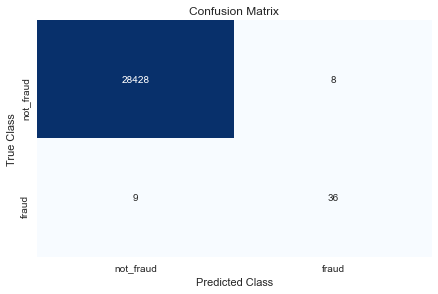

In [157]:
class_names = ['not_fraud', 'fraud']
y_pred4 = 1*(model4.predict(Xval.astype(np.float32)).flatten() >= 0.5)

matrix = confusion_matrix(Yval, y_pred4)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [158]:
fpr2, tpr2, thresholds = roc_curve(Yval, y_pred4)
print("R2 of model 4 is:", r2_score(Yval, y_pred4))
print("Accuracy of model 4 is:",np.mean(Yval == y_pred4))
print(classification_report(Yval, y_pred4))
print('Model 4 AUC: {}'.format(auc(fpr2, tpr2)))

R2 of model 4 is: 0.6216243884903332
Accuracy of model 4 is: 0.999403110845827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28436
           1       0.82      0.80      0.81        45

    accuracy                           1.00     28481
   macro avg       0.91      0.90      0.90     28481
weighted avg       1.00      1.00      1.00     28481

Model 4 AUC: 0.8998593332395555


#### Finding Best FNN Model <a class="anchor" id=section_4_2></a> 

##### AUC <a class="anchor" id=section_4_2_1></a> 

In [159]:
#results of validation sample
fpr23, tpr23, thresholds = roc_curve(Yval, y_pred1)
fpr2, tpr2, thresholds = roc_curve(Yval, y_pred2)
fpr21, tpr21, thresholds = roc_curve(Yval, y_pred3)
fpr22, tpr22, thresholds = roc_curve(Yval, y_pred4)

models = pd.DataFrame({
    'Model': ['FNN Model 1', 'FNN Model 2', 'FNN Model 3', 'FNN Model 4'],
    'AUC Score': [auc(fpr23, tpr23),auc(fpr2, tpr2),
                  auc(fpr21, tpr21),auc(fpr22, tpr22)]})

models.sort_values(by='AUC Score', ascending=False)

,Model,AUC Score
0,FNN Model 1,0.933175
1,FNN Model 2,0.922064
3,FNN Model 4,0.899859
2,FNN Model 3,0.877672


##### Precision <a class="anchor" id=section_4_2_2></a> 

In [160]:
precision_0 = precision_score(Yval, y_pred1)
precision_1 = precision_score(Yval, y_pred2)
precision_2 = precision_score(Yval, y_pred3)
precision_3 = precision_score(Yval, y_pred4)

models = pd.DataFrame({
    'Model': ['FNN Model 1', 'FNN Model 2', 'FNN Model 3', 'FNN Model 4'],
    'Precision': [precision_0,precision_1, precision_2,precision_3]})

models.sort_values(by='Precision', ascending=False)

,Model,Precision
2,FNN Model 3,0.850000
3,FNN Model 4,0.818182
0,FNN Model 1,0.812500
1,FNN Model 2,0.808511


##### Recall <a class="anchor" id=section_4_2_3></a> 

In [161]:
recall_0 = recall_score(Yval, y_pred1)
recall_1 = recall_score(Yval, y_pred2)
recall_2 = recall_score(Yval, y_pred3)
recall_3 = recall_score(Yval, y_pred4)

models = pd.DataFrame({
    'Model': ['FNN Model 1', 'FNN Model 2', 'FNN Model 3', 'FNN Model 4'],
    'Recall': [recall_0,recall_1,recall_2, recall_3 ]})

models.sort_values(by='Recall', ascending=False)

,Model,Recall
0,FNN Model 1,0.866667
1,FNN Model 2,0.844444
3,FNN Model 4,0.800000
2,FNN Model 3,0.755556


#### Analysis: On testing Sample <a class="anchor" id=section_4_3></a> 

##### AUC <a class="anchor" id=section_4_3_1></a> 

In [162]:
#results over testing sample as we choose model 1 as our best model
# Prediction on test data
pred_fnn = 1*(model1.predict(Xtest.astype(np.float32)).flatten() >= 0.5)

fpr2, tpr2, thresholds = roc_curve(Ytest, pred_fnn)
auc_fnn = auc(fpr2, tpr2)
print('FNN Model AUC for testing sample: {}'.format(auc_fnn))

FNN Model AUC for testing sample: 0.893118832634773


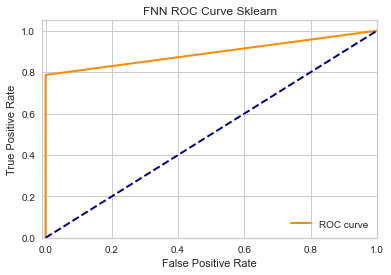

In [163]:
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

##### Precision&Recall<a class="anchor" id=section_4_3_2></a> 

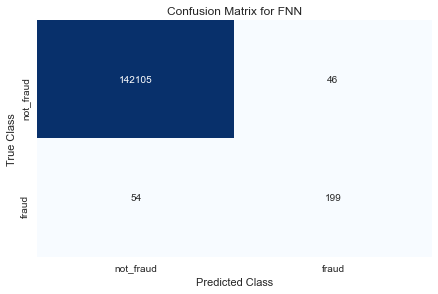

In [164]:
# precision and recall, confusion matrics
class_names = ['not_fraud', 'fraud']
matrix_fnn = confusion_matrix(Ytest, pred_fnn)
dataframe = pd.DataFrame(matrix_fnn, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix for FNN"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [165]:
print('We have detected ' + str(matrix_fnn[1][1]) + ' frauds / ' + 
      str(matrix_fnn[1][1]+matrix_fnn[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_fnn[1][1]/(matrix_fnn[1][1]+matrix_fnn[1][0])))
print("the accuracy is : "+ str((matrix_fnn[0][0] + matrix_fnn[1][1]) / 
                                (sum(matrix_fnn[0]) + sum(matrix_fnn[1]))))

We have detected 199 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.7865612648221344
the accuracy is : 0.9992977725344794


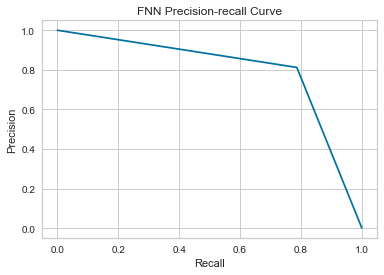

In [166]:
precision, recall, _ = precision_recall_curve(Ytest, pred_fnn)
plt.plot(recall, precision)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("FNN Precision-recall Curve")
plt.show()

In [167]:
print(classification_report(Ytest, pred_fnn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.81      0.79      0.80       253

    accuracy                           1.00    142404
   macro avg       0.91      0.89      0.90    142404
weighted avg       1.00      1.00      1.00    142404



In [168]:
# evaluation
# calculate average error and standard deviation
testYDiff_fnn = np.abs(Ytest-pred_fnn)
avgErr_fnn = np.mean(testYDiff_fnn)
stdErr_fnn = np.std(testYDiff_fnn)

print('FNN average error: {} ({})'.format(avgErr_fnn, stdErr_fnn))

FNN average error: 0.0007022274655206314 (0.026490268819083358)


###### Conclusion---Best FNN Model

In [169]:
recall_fnn = recall_score(Ytest, pred_fnn)
precision_fnn = precision_score(Ytest, pred_fnn)
score_fnn = np.mean(Ytest == pred_fnn)

fnn_model = pd.DataFrame({
    'Model': ['FNN Model 1'], #best model
    'AUC Score': [auc_fnn],
    'Recall': [recall_fnn],
    'Precision': [precision_fnn],
    'Accuracy': [score_fnn]
})

display(fnn_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,FNN Model 1,0.893119,0.786561,0.812245,0.999298


<br>

### 5. Support Vector Machine <a class="anchor" id="PART_5"></a>

#### 5.1 Finding Best Model with different C value<a class="anchor" id="section_5_1"></a> 

In [172]:
#SVM: Optimize with AUC
c_range = [.25, 1, 2, 5]#
frame = pd.DataFrame(columns = ['c_range', 'AUC']) 

for c_value in c_range:
    model_svm = svm.SVC(kernel='linear', C=c_value)
    model_svm.fit(X=Xtrain, y=Ytrain)
    
    #initialize empty
    fpr1 = dict()
    tpr1 = dict()
    lw = 2 
    
    #predictions
    svm_score = model_svm.decision_function(Xval)
    
    #store false and true positive rate
    fpr1 = roc_curve(Yval, svm_score)[0]
    tpr1 = roc_curve(Yval, svm_score)[1]
    svm_auc = roc_auc_score(Yval, svm_score)
    
    frame = frame.append({'c_range' : c_value, 'AUC' : svm_auc},ignore_index = True) 
    print("Done with: {}, None".format(c_value))
    
#print('Sklearn AUC: {} '.format(auc))
display(frame)

Done with: 0.25, None
Done with: 1, None
Done with: 2, None
Done with: 5, None


,c_range,AUC
0,0.25,0.951871
1,1.00,0.955309
2,2.00,0.955317
3,5.00,0.955383


In [173]:
#So we select C=5
model_svm = svm.SVC(kernel='linear', C=5)
model_svm.fit(X=Xtrain, y=Ytrain)

SVC(C=5, kernel='linear')

#### Analysis: On testing Sample  <a class="anchor" id=section_5_2></a> 

In [174]:
#predictions
score_svm = model_svm.decision_function(Xtest)
preds_svm = model_svm.predict(Xtest)

##### AUC Score <a class="anchor" id=section_5_2_1></a> 

In [175]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_svm)
auc_svm = metrics.auc(fpr, tpr)
print('SVM Model AUC for testing sample: {}'.format(auc_svm))

SVM Model AUC for testing sample: 0.9308503235842596


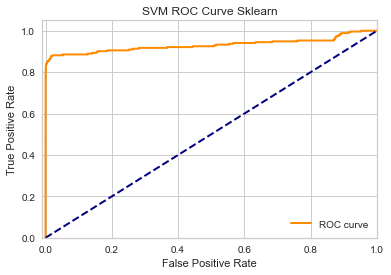

In [176]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

##### Precision&Recall<a class="anchor" id=section_5_2_2></a> 

In [177]:
#confusion matrix
class_names = ['not_fraud', 'fraud']
matrix_svm = confusion_matrix(Ytest, preds_svm)

precision_svm = [matrix_svm[0][0]/(matrix_svm[0][0]+matrix_svm[1][0]), 
             matrix_svm[1][1]/(matrix_svm[1][1]+matrix_svm[0][1])]
recall_svm = [matrix_svm[0][0]/(matrix_svm[0][0]+matrix_svm[0][1]), 
          matrix_svm[1][1]/(matrix_svm[1][1]+matrix_svm[1][0])]

acc_svm =(matrix_svm[0][0]+matrix_svm[1][1])/(sum(matrix_svm[0]) + sum(matrix_svm[1]))

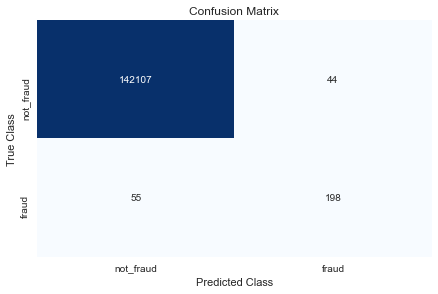

In [178]:
# Create pandas dataframe
dataframe = pd.DataFrame(matrix_svm, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [179]:
#print
print('We have detected ' + str(matrix_svm[1][1]) + ' frauds / ' + 
      str(matrix_svm[1][1]+matrix_svm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(matrix_svm[1][1]/(matrix_svm[1][1]+matrix_svm[1][0])))
print("the accuracy is : "+ str(acc_svm))

print(f'SVM (C=5) model accuracy is {str(acc_svm)}')
print(f'SVM (C=5) model precision for 0 and 1 is {precision_svm}')
print (f'SVM (C=5) model recall for 0 and 1  is {recall_svm}')

We have detected 198 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.782608695652174
the accuracy is : 0.9993047948091346
SVM (C=5) model accuracy is 0.9993047948091346
SVM (C=5) model precision for 0 and 1 is [0.9996131174294115, 0.8181818181818182]
SVM (C=5) model recall for 0 and 1  is [0.9996904699931762, 0.782608695652174]


###### Conclusion---Best SVM Model

In [180]:
svm_model = pd.DataFrame({
    'Model': ['Support Vector Machine'], 
    'AUC Score': [auc_svm],
    'Recall': [recall_svm[1]],
    'Precision': [precision_svm[1]],
    'Accuracy': [acc_svm]
})

display(svm_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,Support Vector Machine,0.93085,0.782609,0.818182,0.999305


### 6.  Random Forest <a class="anchor" id="PART_6"></a>

#### 6.1 Models with different number of estimators <a class="anchor" id="section_6_1"></a> 

In [194]:
n_estimators = [1000, 1200, 1500, 2000, 2500, 5000]
frame = pd.DataFrame(columns = ['n_est', 'max_depth', 'AUC']) 
  
for est in n_estimators:
    rfc = RandomForestClassifier(max_depth = None, n_estimators = est ) 
    rfc.fit(Xtrain, Ytrain) 

    rfcfpr1 = dict()
    rfctpr1 = dict()
    lw = 2 
    #predictions
    rfc_score = rfc.predict_proba(Xval)[:,1]
    rfcfpr1 = roc_curve(Yval, rfc_score)[0]
    rfctpr1 = roc_curve(Yval, rfc_score)[1]
    rfc_auc = roc_auc_score(Yval, rfc_score)
    
    frame = frame.append({'n_est' : est, 'max_depth' : None, 'AUC' : rfc_auc},  
            ignore_index = True) 
    print("Done with: {}, None".format(est))

display(frame)

Done with: 1000, None
Done with: 1200, None
Done with: 1500, None
Done with: 2000, None
Done with: 2500, None
Done with: 5000, None


,n_est,max_depth,AUC
0,1000.0,NaN,0.973516
1,1200.0,NaN,0.974837
2,1500.0,NaN,0.974434
3,2000.0,NaN,0.984181
4,2500.0,NaN,0.983707
5,5000.0,NaN,0.983510


#### Analysis: On testing Sample  <a class="anchor" id=section_6_2></a> 

In [195]:
#So we choose n=2000, random forest model creation 
rfc = RandomForestClassifier(max_depth = None, n_estimators = 2000) 
rfc.fit(Xtrain, Ytrain) 

RandomForestClassifier(n_estimators=2000)

In [196]:
#predictions
pred_rfc = rfc.predict(Xtest)
#auc predictions
score_rfc = rfc.predict_proba(Xtest)[:,1]

##### AUC Score <a class="anchor" id=section_6_2_1></a> 

Random Forest AUC for testing sample: 0.96575804835714


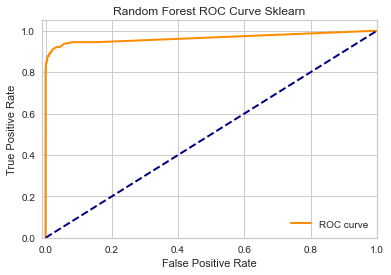

In [197]:
#AUC CURVE
fpr, tpr, thresholds = roc_curve(Ytest, score_rfc)
auc_rfc = metrics.auc(fpr, tpr)
print('Random Forest AUC for testing sample: {}'.format(auc_rfc))

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve Sklearn')
plt.legend(loc="lower right")
plt.show()

##### Precision&Recall <a class="anchor" id=section_6_2_2></a> 

In [198]:
#confusion matrix
class_names = ['not_fraud', 'fraud']
rfcmatrix = confusion_matrix(Ytest,pred_rfc)
rfcprecision = [rfcmatrix[0][0]/(rfcmatrix[0][0]+rfcmatrix[1][0]),
                rfcmatrix[1][1]/(rfcmatrix[1][1]+rfcmatrix[0][1])]
rfcrecall = [rfcmatrix[0][0]/(rfcmatrix[0][0]+rfcmatrix[0][1]),
             rfcmatrix[1][1]/(rfcmatrix[1][1]+rfcmatrix[1][0])]
rfcacc = (rfcmatrix[0][0]+rfcmatrix[1][1]) / (sum(rfcmatrix[0]) + sum(rfcmatrix[1]))

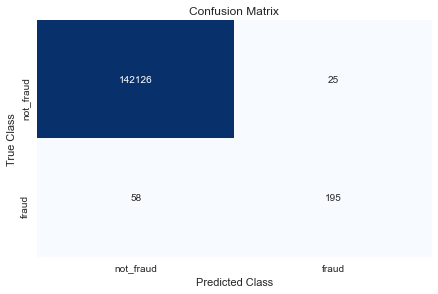

In [199]:
# Create pandas dataframe
rfcdataframe = pd.DataFrame(rfcmatrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(rfcdataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [200]:
#print
print('We have detected ' + str(rfcmatrix[1][1]) + ' frauds / ' + 
      str(rfcmatrix[1][1]+rfcmatrix[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + 
      str(rfcmatrix[1][1]/(rfcmatrix[1][1]+rfcmatrix[1][0])))
print("the accuracy is : "+ str(rfcacc ))

print(f'Random Forest model accuracy is {rfcacc}')
print(f'Random Forest model precision for 0 and 1 is {rfcprecision}')
print (f'Random Forest model recall for 0 and 1  is {rfcrecall}')

We have detected 195 frauds / 253 total frauds.

So, the probability to detect a fraud is 0.7707509881422925
the accuracy is : 0.9994171512036178
Random Forest model accuracy is 0.9994171512036178
Random Forest model precision for 0 and 1 is [0.9995920778709279, 0.8863636363636364]
Random Forest model recall for 0 and 1  is [0.9998241306779411, 0.7707509881422925]


No handles with labels found to put in legend.


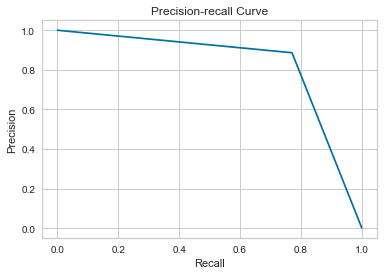

In [201]:
#Precision Recall Curve
precisionp, recallp, _ = precision_recall_curve(Ytest, pred_rfc)
plt.plot(recallp, precisionp)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-recall Curve")
plt.legend(loc="lower right")
plt.show()

In [202]:
#need more decimals
print(classification_report(Ytest, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142151
           1       0.89      0.77      0.82       253

    accuracy                           1.00    142404
   macro avg       0.94      0.89      0.91    142404
weighted avg       1.00      1.00      1.00    142404



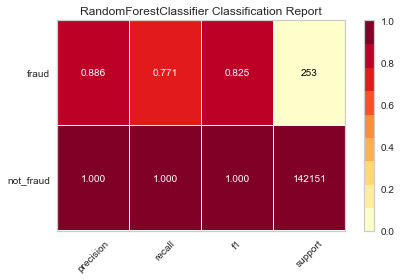

In [206]:
visualizer = ClassificationReport(rfc, classes = class_names, support = True)
visualizer.fit( Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer.show()

In [203]:
# evaluation
# calculate average error and standard deviation
testYDiff = np.abs(Ytest-pred_rfc)
avgErr_rfc = np.mean(testYDiff)
stdErr_rfc = np.std(testYDiff)

print('Random Forest average error: {} ({})'.format(avgErr_rfc, stdErr_rfc))

Random Forest average error: 0.000582848796382124 (0.024135224955709026)


###### Conclusion---Best Random Forest Model

In [204]:
rfc_model = pd.DataFrame({
    'Model': ['Random Forest'], 
    'AUC Score': [auc_rfc],
    'Recall': [rfcrecall[1]],
    'Precision': [rfcprecision[1]],
    'Accuracy': [rfcacc]
})

display(rfc_model)

,Model,AUC Score,Recall,Precision,Accuracy
0,Random Forest,0.965758,0.770751,0.886364,0.999417


### Model Comparison

In [60]:
models_best = pd.DataFrame()

models_best = models_best.append([linear_model, logit_model, knn_model, 
                                  fnn_model, svm_model, rfc_model],
                                 ignore_index=True)

display(models_best)

#models_best.to_csv("model.csv")

,Model,AUC Score,Recall,Precision,Accuracy
0,LinearDiscriminantAnalysis,0.983247,0.770751,0.855263,0.999361
1,Logistic Regression - Lasso Penalization 2,0.812179,0.624506,0.882682,0.999185
2,KNearestNeighbors Model,0.912884,0.766798,0.873874,0.999389
3,FNN Model 1,0.893119,0.786561,0.812245,0.999298
4,Support Vector Machine,0.930850,0.782609,0.818182,0.999305
5,Random Forest,0.965758,0.770751,0.886364,0.999417
